# Simple Linear Regression- Calrios Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\calories_consumed.csv")
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
df.shape
# rows=14 and columns=2

(14, 2)

In [4]:
df.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [5]:
df.columns="Weight_Gain","Calories_Consumed"

In [6]:
df.head()

,Weight_Gain,Calories_Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Weight_Gain        14 non-null     int64
 1   Calories_Consumed  14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [8]:
df.isnull().sum()

Weight_Gain          0
Calories_Consumed    0
dtype: int64

In [9]:
df.describe()

,Weight_Gain,Calories_Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


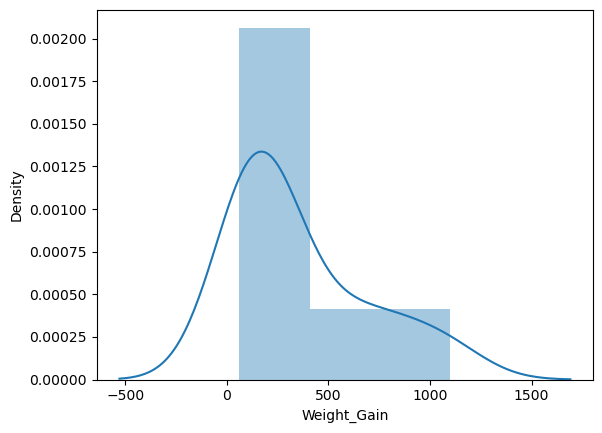

In [10]:
sns.distplot(df["Weight_Gain"])
plt.show()
# Data is right skewed

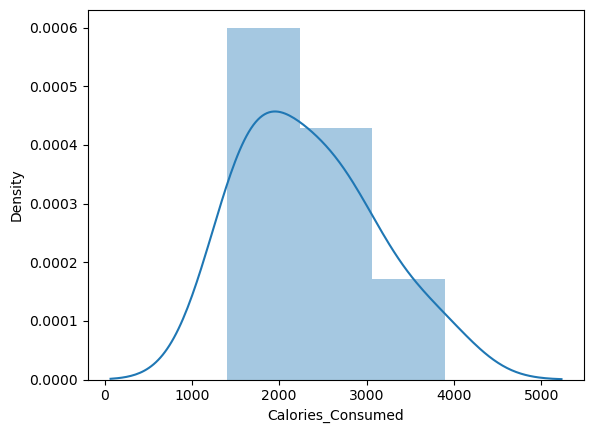

In [11]:
sns.distplot(df["Calories_Consumed"])
plt.show()
# data is lightly right skewed 

In [13]:
df["Calories_Consumed"]=np.log(df["Calories_Consumed"])

In [14]:
df["Weight_Gain"]=np.log(df["Weight_Gain"])

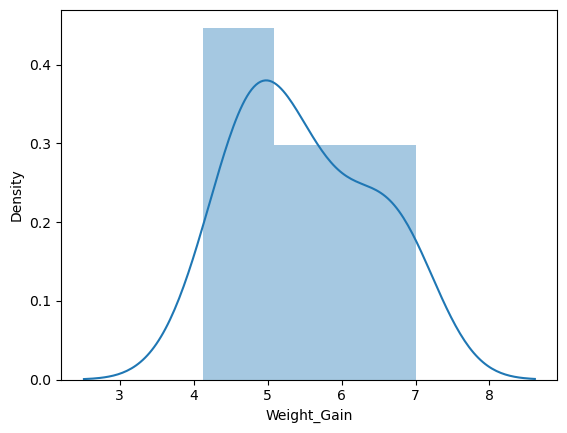

In [15]:
sns.distplot(df["Weight_Gain"])
plt.show()
# after log transformation, data become normally distributed

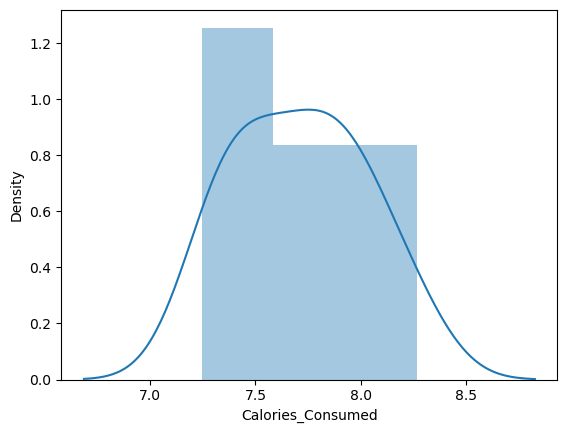

In [16]:
sns.distplot(df["Calories_Consumed"])
plt.show()
# after log transformation, data become normally distributed

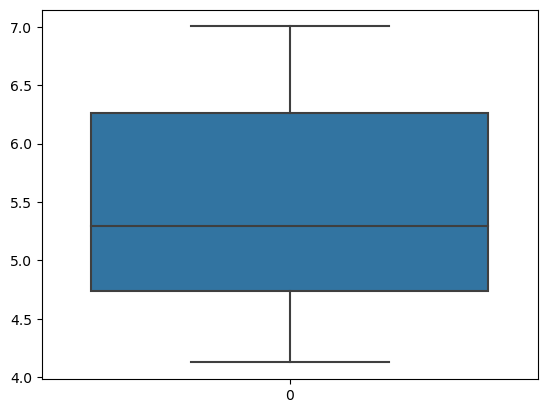

In [17]:
sns.boxplot(df["Weight_Gain"])
plt.show()
# no outliers are present

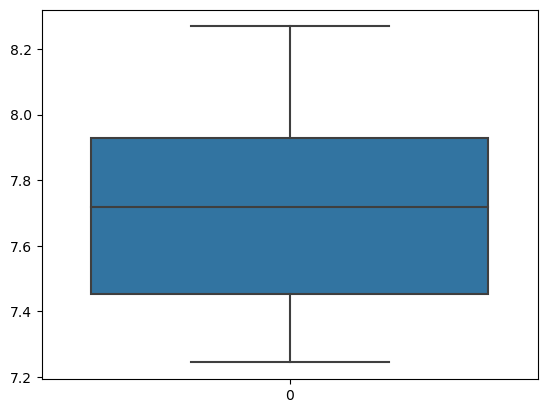

In [18]:
sns.boxplot(df["Calories_Consumed"])
plt.show()
# no outliers are present

In [19]:
df.head()

,Weight_Gain,Calories_Consumed
0,4.682131,7.313220
1,5.298317,7.740664
2,6.802395,8.131531
3,5.298317,7.696213
4,5.703782,7.824046


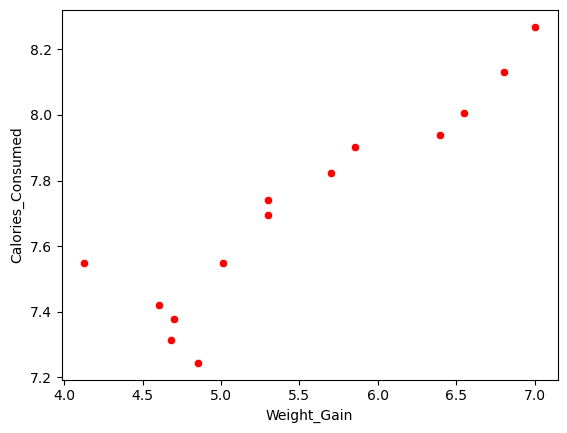

In [21]:
sns.scatterplot(x=df["Weight_Gain"],y=df["Calories_Consumed"],color="r")
plt.show()

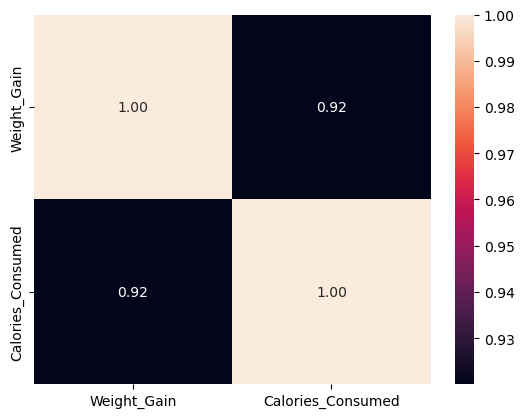

In [22]:
sns.heatmap(df.corr(),annot=True,fmt="0.02f")
plt.show()
# from this graph, we can see that both columns have strong positive correlation because 
# value of correlation coefficient is 0.92 > 0.8 .

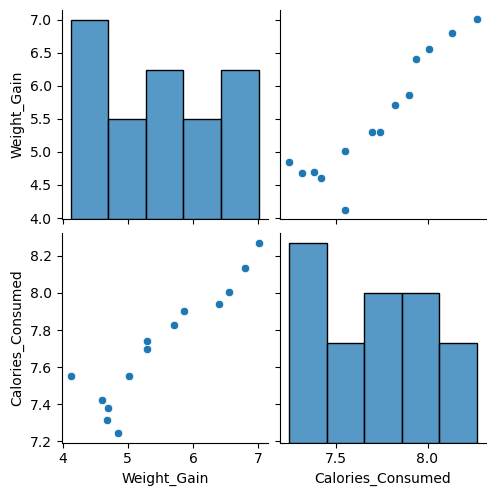

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
import statsmodels.formula.api as smf

In [25]:
model=smf.ols("Calories_Consumed~Weight_Gain",data=df).fit()

In [26]:
model.summary()
# R-sqarred=0.896>0.85,model is good
# p=00<0.05 hence acceptable
# bita-0=5.9558 
# bita-1=0.4202

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_Consumed   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     66.17
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           3.17e-06
Time:                        19:07:59   Log-Likelihood:                 9.8901
No. Observations:                  14   AIC:                            -15.78
Df Residuals:                      12   BIC:                            -14.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.9558      0.219     27.250      0.000       5.480       6.432
Weight_Gain     0.3197      0.039      8.135      0.000       0.234       0.405
==============================================================================
Omnibus:                        2.281   Durbin-Watson:                   2.808
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                0.444
Skew:                           0.031   Prob(JB):                        0.801
Kurtosis:                       3.870   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred=model.predict(df["Weight_Gain"])
pred.head()

0    7.452565
1    7.649547
2    8.130371
3    7.649547
4    7.779166
dtype: float64

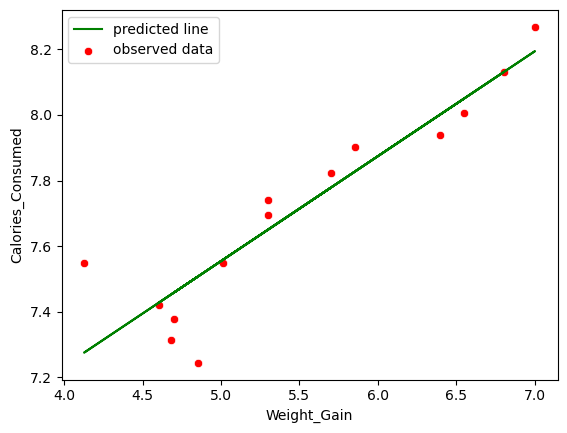

In [33]:
plt.plot(df["Weight_Gain"],pred,"g")
sns.scatterplot(x=df["Weight_Gain"],y=df["Calories_Consumed"],color="r")
plt.legend(["predicted line","observed data"])
plt.show()

In [34]:
# Error calculation'
residual=df["Weight_Gain"] - pred1
np.mean(residual)

-2.219395475765533

In [35]:
residual_sqr = residual*residual
MSE=np.mean(residual_sqr)
RMSE=np.sqrt(MSE)
RMSE

2.298193863713563